In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the Breast Cancer Wisconsin (Diagnostic) Data set
data_set = pd.read_csv('Cancer_data.csv')

In [3]:
#display top 5 rows of data set
data_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#display shape of the data set
data_set.shape

(569, 33)

In [5]:
#unique values
data_set.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
#counting the values of variables in diagnosis
data_set['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

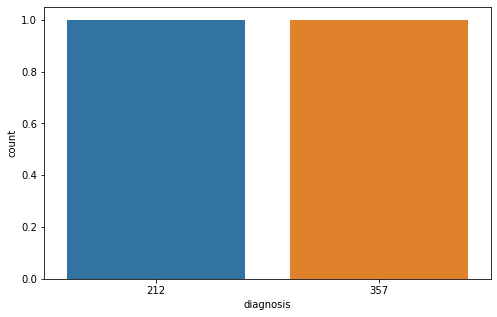

In [7]:
#plotting the value counts
plt.figure(figsize=[8,5])
sns.countplot(data_set['diagnosis'].value_counts())
plt.show()

In [8]:
#droping feature on dataset
data_set.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [9]:
#check any missing values in the data set
print(str('Any missing data or NaN in the dataset:'),data_set.isnull().values.any())

Any missing data or NaN in the dataset: False


--------BUILDING THE MODEL--------


In [10]:
#set X and y
X = data_set.drop(['diagnosis'], axis = 1)
y = data_set['diagnosis']


In [11]:
# independent variables
X = data_set.drop('diagnosis',axis=1)
#dependent variables
y = data_set.diagnosis


In [12]:
#import the label Encoder
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

In [13]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 40)

In [14]:
# scikit learn StandardScaler module to scale the training and testing dataset
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

---------LOGISTIC REGRESSION ----------------

In [15]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression
#create an object
log = LogisticRegression()

#fit the model
model_new = log.fit(X_train, y_train)
#predict the model
prediction = model_new.predict(X_test)

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, prediction)
conf

array([[111,   4],
       [  2,  54]], dtype=int64)

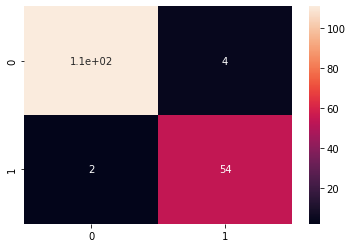

In [17]:
#display heatmap
sns.heatmap(conf, annot = True)
plt.show()

In [18]:
#import accuracy score to print the accuracy of model
from sklearn.metrics import accuracy_score
#print the accuracy
print("Accuracy for Logistic Regression = ",accuracy_score(y_test, prediction) * 100, '%')


Accuracy for Logistic Regression =  96.49122807017544 %


In [19]:
#create a pickle file
import pickle
pickle_out = open("model_new.pkl","wb")
pickle.dump(model_new, pickle_out)
pickle_out.close()
